# FHV pickups from January to August 2015 analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from extract_data import extract_day_month
from plot_rides import plot_rides_by_day_for_each_month, plot_number_of_trips_or_vehicles_by_attribute

This dataset contains daily pickup data for 329 FHV (for-hire vehicle) companies from January 2015 through August 2015.  

**Attributes:**
1. Base Number - base identifier associated with the dispatching company or base that provides the ride services
2. Base Name - name that corresponds to the base number
3. Pick Up Date - self explanatory
4. Number of trips - self explanatory
5. Number of vehicles - self explanatory

In [2]:
data = pd.read_csv('../data/other-FHV-services_jan-aug-2015.csv')

In [3]:
data.head()

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles
0,B00013,LOVE CORP CAR INC,01/01/2015,26,17
1,B00014,NY ONE CORP CAR INC,01/01/2015,45,24
2,B00029,COMMUNITY CAR SVC CORP,01/01/2015,731,36
3,B00053,CHARGE AND RIDE INC,01/01/2015,10,9
4,B00095,LIBERTY CAR SERVICE INC.,01/01/2015,814,62


In [4]:
data.shape

(26181, 5)

In [5]:
data.describe()

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles
count,26181,26181,26181,26181,26181
unique,334,329,243,1906,445
top,B02147,"MITA LIMOUSINE, INC.",05/13/2015,1,-
freq,212,212,212,988,1716


In [6]:
data.isnull().sum()

Base Number           0
Base Name             0
Pick Up Date          0
Number of Trips       0
Number of Vehicles    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26181 entries, 0 to 26180
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Base Number         26181 non-null  object
 1   Base Name           26181 non-null  object
 2   Pick Up Date        26181 non-null  object
 3   Number of Trips     26181 non-null  object
 4   Number of Vehicles  26181 non-null  object
dtypes: object(5)
memory usage: 1022.8+ KB


In [8]:
def clean_numeric_column(column):
    return pd.to_numeric(column.str.replace(',', '').str.strip(), errors='coerce').fillna(0).astype(int)

In [9]:
data['Number of Trips'] = clean_numeric_column(data['Number of Trips'])
data['Number of Vehicles'] = clean_numeric_column(data['Number of Vehicles'])

In [10]:
data['Date/Time'] = pd.to_datetime(data['Pick Up Date'])
data.drop('Pick Up Date', axis = 1)
extract_day_month(data)

In [11]:
data

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles,Date/Time,Month,Day,DayOfWeek
0,B00013,LOVE CORP CAR INC,01/01/2015,26,17,2015-01-01,January,1,Thursday
1,B00014,NY ONE CORP CAR INC,01/01/2015,45,24,2015-01-01,January,1,Thursday
2,B00029,COMMUNITY CAR SVC CORP,01/01/2015,731,36,2015-01-01,January,1,Thursday
3,B00053,CHARGE AND RIDE INC,01/01/2015,10,9,2015-01-01,January,1,Thursday
4,B00095,LIBERTY CAR SERVICE INC.,01/01/2015,814,62,2015-01-01,January,1,Thursday
...,...,...,...,...,...,...,...,...,...
26176,B02666,"D.L.C. LIMOUSINE SERVICE, INC.",08/30/2015,4,3,2015-08-30,August,30,Sunday
26177,B01313,JOY CAR SERVICES INC.,08/31/2015,14,14,2015-08-31,August,31,Monday
26178,B01509,"BRUNWISH ENTERPRISES,LTD.",08/31/2015,736,63,2015-08-31,August,31,Monday
26179,B01614,R TRANSPORT INC,08/31/2015,45,8,2015-08-31,August,31,Monday


In [12]:
data['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [13]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']

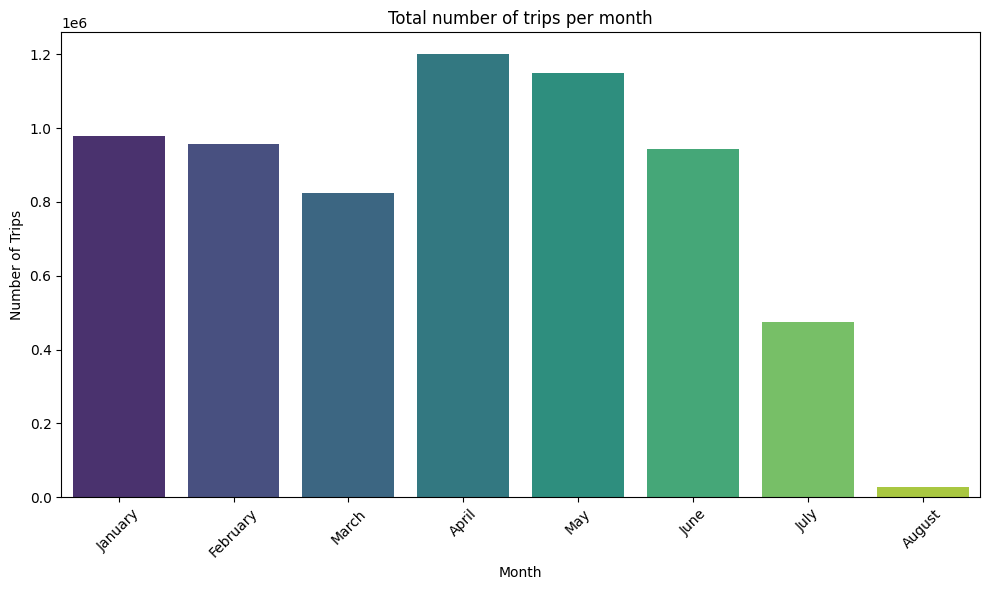

In [14]:
plot_number_of_trips_or_vehicles_by_attribute(data, 'Number of Trips', 'Month', None, month_order)

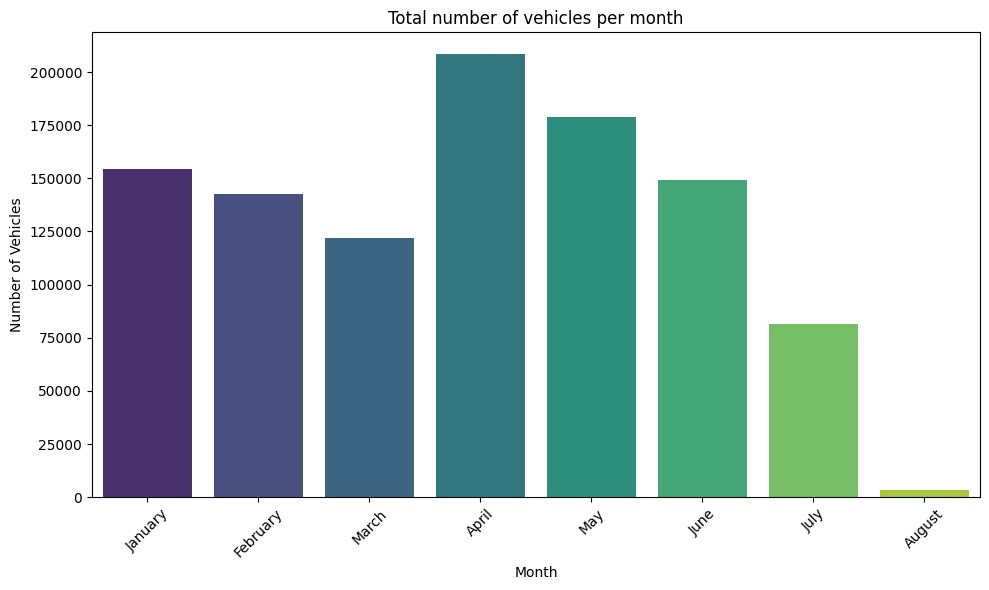

In [15]:
plot_number_of_trips_or_vehicles_by_attribute(data, 'Number of Vehicles', 'Month', None, month_order)

We have the most data for April, May and January, slightly less for February, March, June and July, while the amount of data for August is negligible.

In [16]:
data

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles,Date/Time,Month,Day,DayOfWeek
0,B00013,LOVE CORP CAR INC,01/01/2015,26,17,2015-01-01,January,1,Thursday
1,B00014,NY ONE CORP CAR INC,01/01/2015,45,24,2015-01-01,January,1,Thursday
2,B00029,COMMUNITY CAR SVC CORP,01/01/2015,731,36,2015-01-01,January,1,Thursday
3,B00053,CHARGE AND RIDE INC,01/01/2015,10,9,2015-01-01,January,1,Thursday
4,B00095,LIBERTY CAR SERVICE INC.,01/01/2015,814,62,2015-01-01,January,1,Thursday
...,...,...,...,...,...,...,...,...,...
26176,B02666,"D.L.C. LIMOUSINE SERVICE, INC.",08/30/2015,4,3,2015-08-30,August,30,Sunday
26177,B01313,JOY CAR SERVICES INC.,08/31/2015,14,14,2015-08-31,August,31,Monday
26178,B01509,"BRUNWISH ENTERPRISES,LTD.",08/31/2015,736,63,2015-08-31,August,31,Monday
26179,B01614,R TRANSPORT INC,08/31/2015,45,8,2015-08-31,August,31,Monday


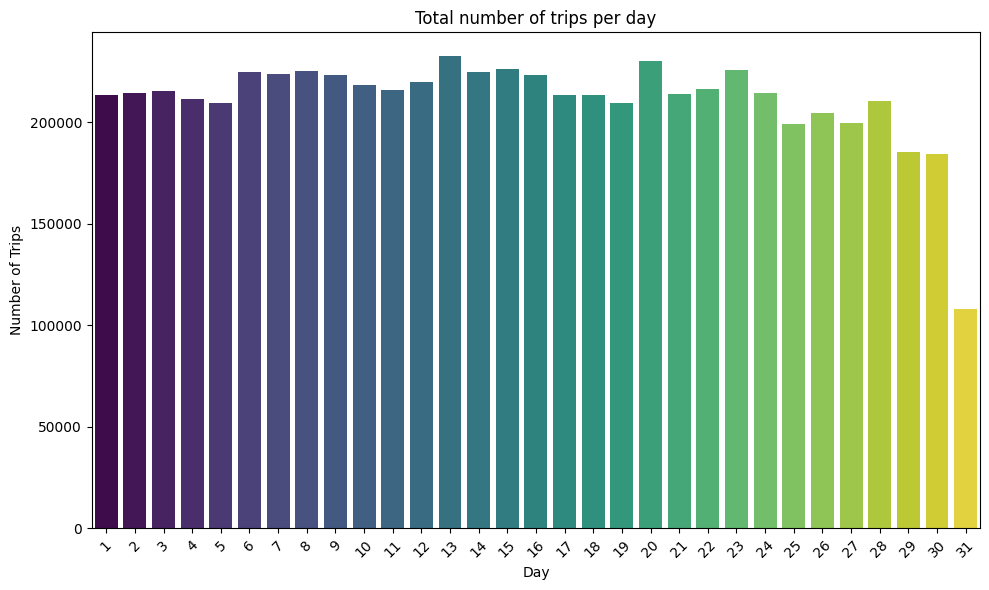

In [17]:
plot_number_of_trips_or_vehicles_by_attribute(data, 'Number of Trips', 'Day')

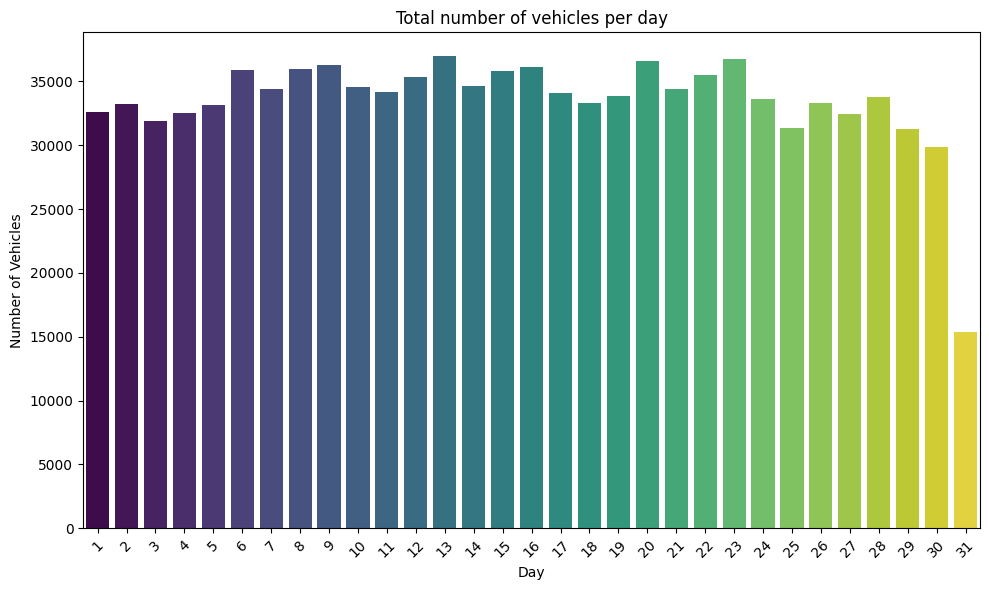

In [18]:
plot_number_of_trips_or_vehicles_by_attribute(data, 'Number of Vehicles', 'Day')

These two barplots show a relatively similar distribution of trips/vehicles as expected.
However, they don't help our analysis much, because the number of trips/vehicles is relatively evenly distributed by day, except for a slight drop at the end of the month and of course the 31st, because not all months have 31 days. Let's see if we'll have more luck looking at separate plots for each month.

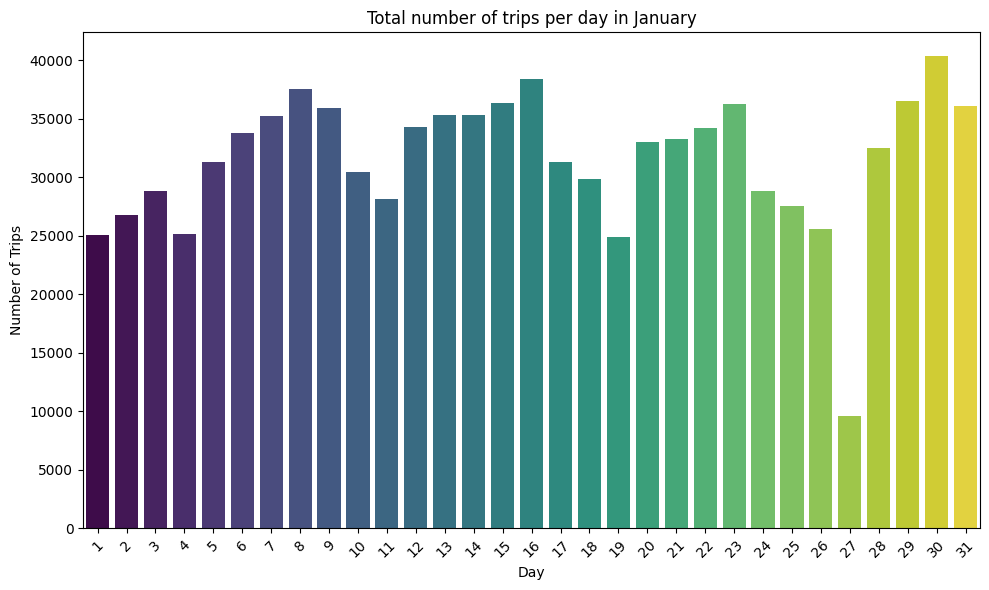

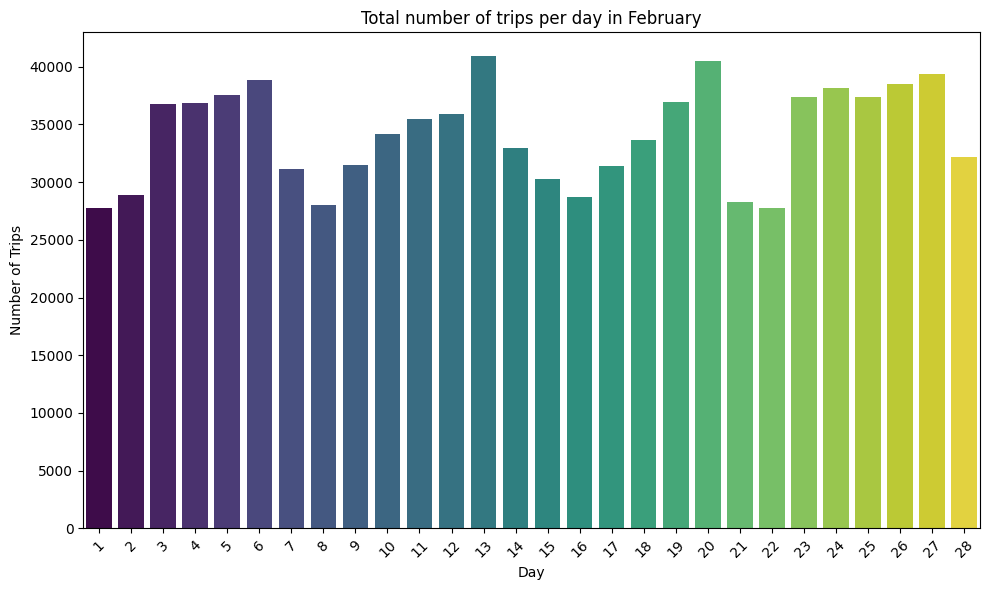

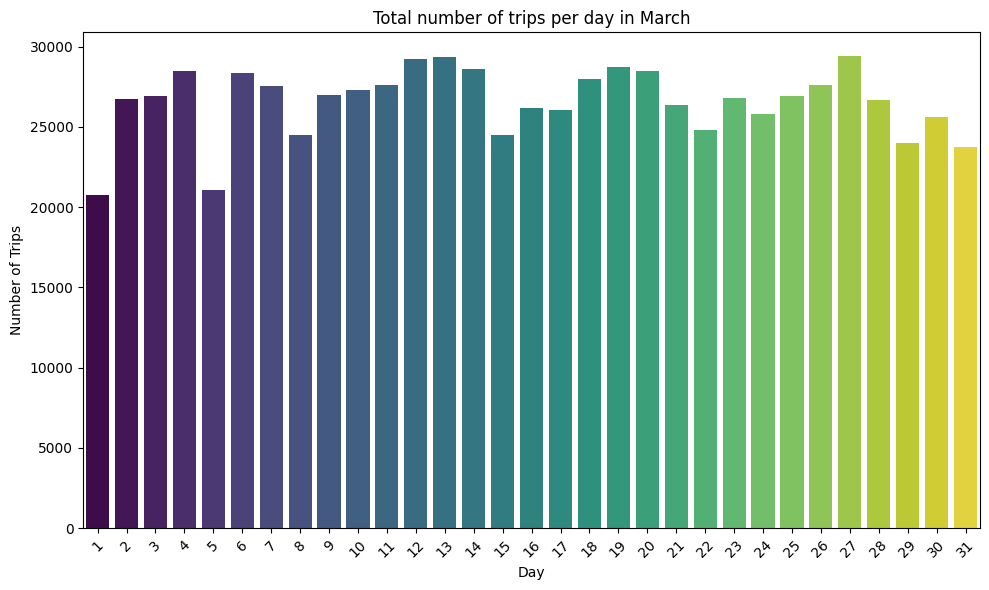

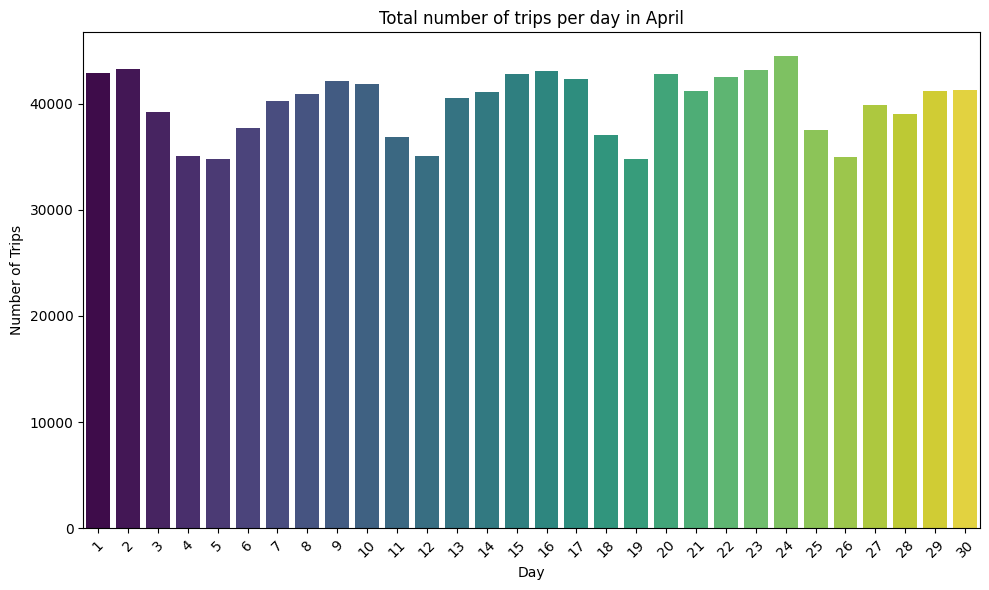

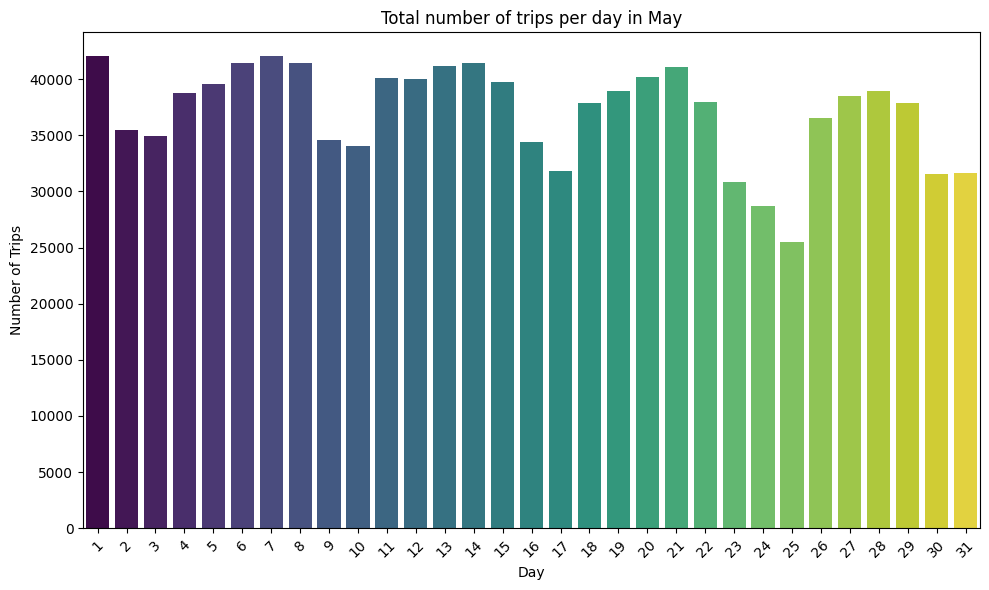

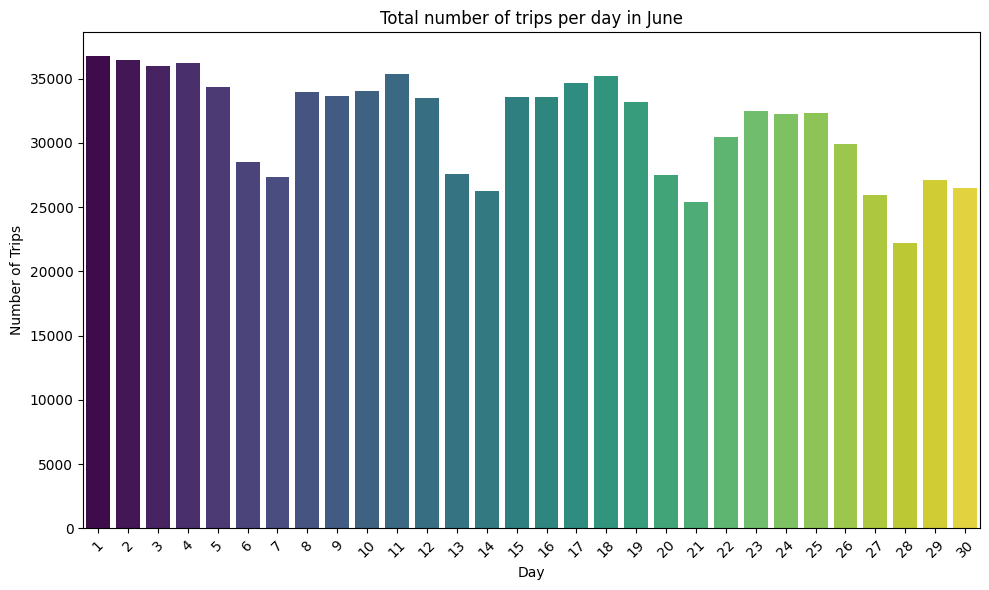

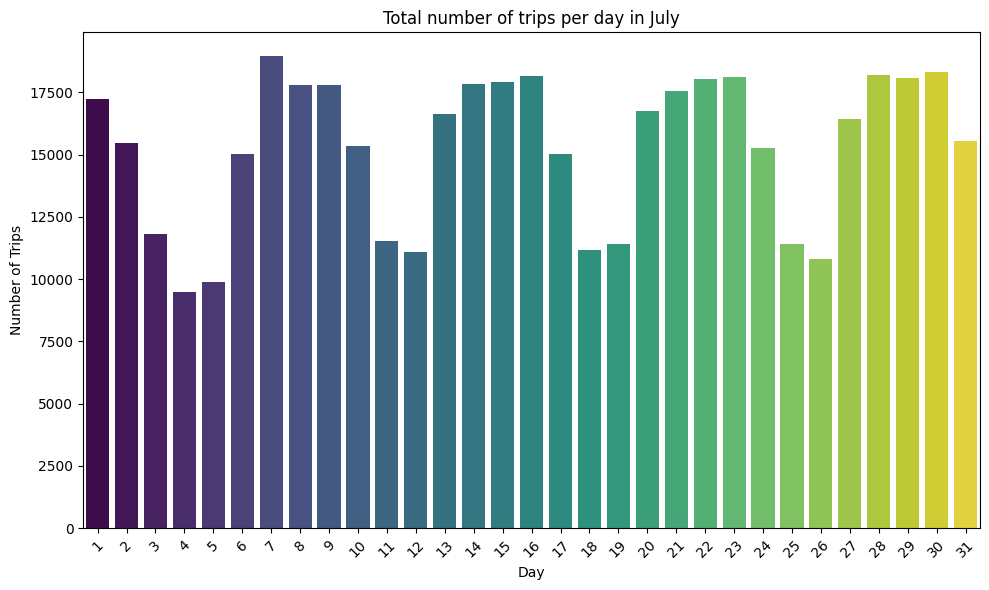

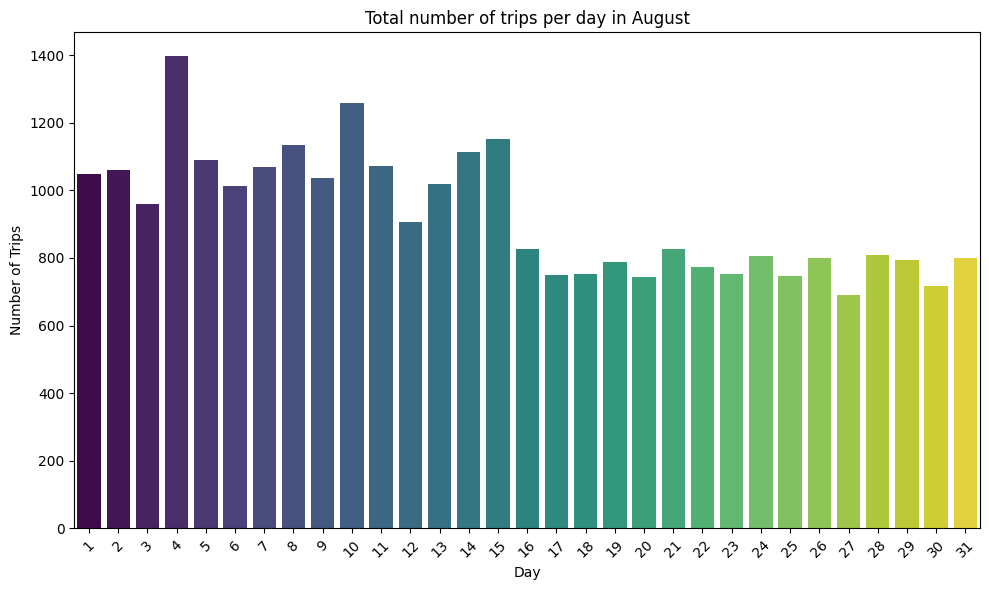

In [19]:
unique_months = data['Month'].unique()

for i, month in enumerate(unique_months):
    month_data = data[data['Month'] == month]
    
    plot_number_of_trips_or_vehicles_by_attribute(month_data, 'Number of Trips', 'Day', month)

**January**  
The graph shows a steady increase in the number of trips from the beginning of January until around the middle of the month (around January 15th).  
After mid-January, the number of trips appears to stabilize with slight fluctuations but generally remains high until the 24th.  
A significant drop is observed between January 25th and January 27th, followed by a sharp recovery towards the end of the month. This coincides with a major winter storm, known as the "Blizzard of 2015" (or "Winter Storm Juno"), which affected the northeastern United States, including New York City. The storm led to travel disruptions, likely causing the decrease in trips.

**February**  
The graph shows relatively high and consistent trip activity throughout February, with some fluctuations. There are no extreme drops or peaks, indicating a stable demand during this month.  
Around February 16th, there is a slight dip in the number of trips, likely due to President's Day, a federal holiday in the United States. Many people might have the day off, resulting in reduced commuting and thus fewer trips.

**March**  
The number of trips in March is fairly consistent throughout the month, with some slight fluctuations. Overall, the graph shows a steady demand, with no significant spikes or drops compared to January and February.

**April**  
There is a noticeable peak at the beginning of the month, followed by a more stable period and then a slight increase towards the end of the month.
A significant dip is noticeable around April 5th. This date coincides with Easter Sunday. On Easter, many people celebrate with family and friends, often staying at home or attending religious services, which can lead to a decrease in ride demand.

**May**  
The beginning of the month starts strong, with a peak on May 1st, followed by a stable period with minor dips and rises throughout the month. There is a small drop in trips on May 10th, which is a Sunday and also Mother's Day in 2015. The dip might be associated with people staying home or engaging in local activities.  
A significant drop in trips is observed around May 25th, which is Memorial Day, a major public holiday in the United States. The reduction in trips could be due to people spending time at home, attending local events, or leaving the city for the long weekend.

**June**  
July shows a significant decline in the overall number of trips compared to previous months like June. The demand is lower, which is typical for the summer season when many people go on vacations.
The trend throughout the month is inconsistent, with noticeable dips and rises.
The big drop happened on June 28th. This date is notable for being during the Pride March in New York City. While the march itself attracts large crowds, it could lead to traffic restrictions and road closures, possibly resulting in fewer pickups or people opting for alternative modes of transportation.

**July** and **August** are covered with significantly less data (especially August), so it's difficult to draw any real conclusions.  
The first few days of July show a steady decrease in trips, with a sharp drop on July 4th. This is Independence Day, a major public holiday in the United States, and the significant reduction in trips on this day is likely due to people attending local events, staying home for celebrations, or leaving the city for the long weekend.  
There are a few more drops that coincide with weekend activities.

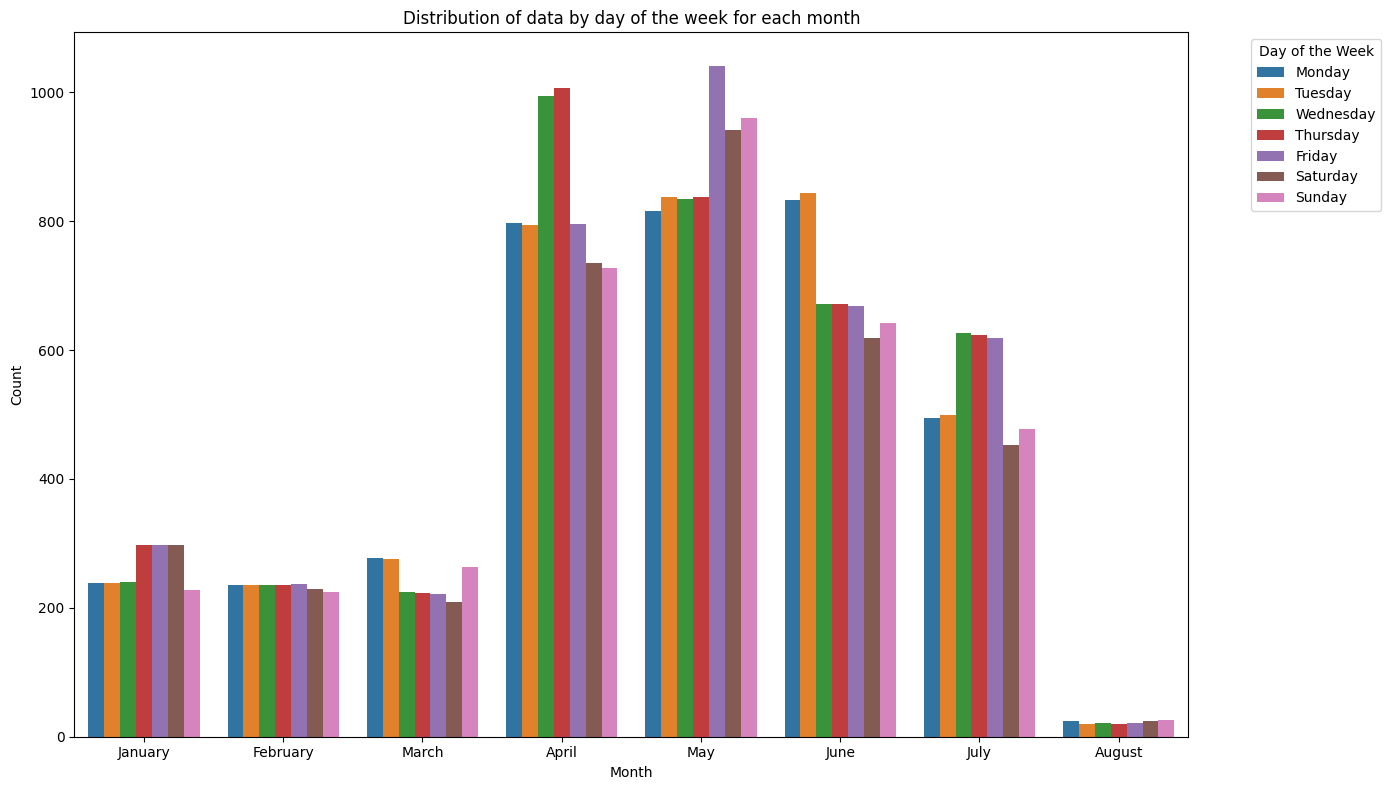

In [20]:
plot_rides_by_day_for_each_month(data, month_order)

This plot visualizes FHV pickup counts by day of the week for each month from January to August. 

There is a clear trend of increased pickups during the midweek days (**Tuesday through Thursday**), indicating higher demand for FHV services. This could be attributed to regular commuting patterns, midweek business activities, or other scheduled events during these days.

**Monday** and **Friday** also show substantial activity but are generally slightly lower than the midweek peak. This might suggest a tapering of activity as people start and end their workweek.

**Saturday** and **Sunday** consistently show lower pickup counts across most months. This reduction could indicate that the demand for FHVs on weekends is significantly less compared to weekdays, possibly due to fewer work-related trips and different social patterns.

The relative distribution remains consistent across months, showing that the demand pattern by day of the week does not fluctuate drastically from month to month. This consistency is crucial for predicting demand and planning resource allocation efficiently.

# Top 40 bases by number of trips/vehicles

In [21]:
base_name_counts = pd.Series(data['Base Name']).value_counts()

In [22]:
trip_base_summary = data.groupby('Base Name')['Number of Trips'].sum().reset_index()

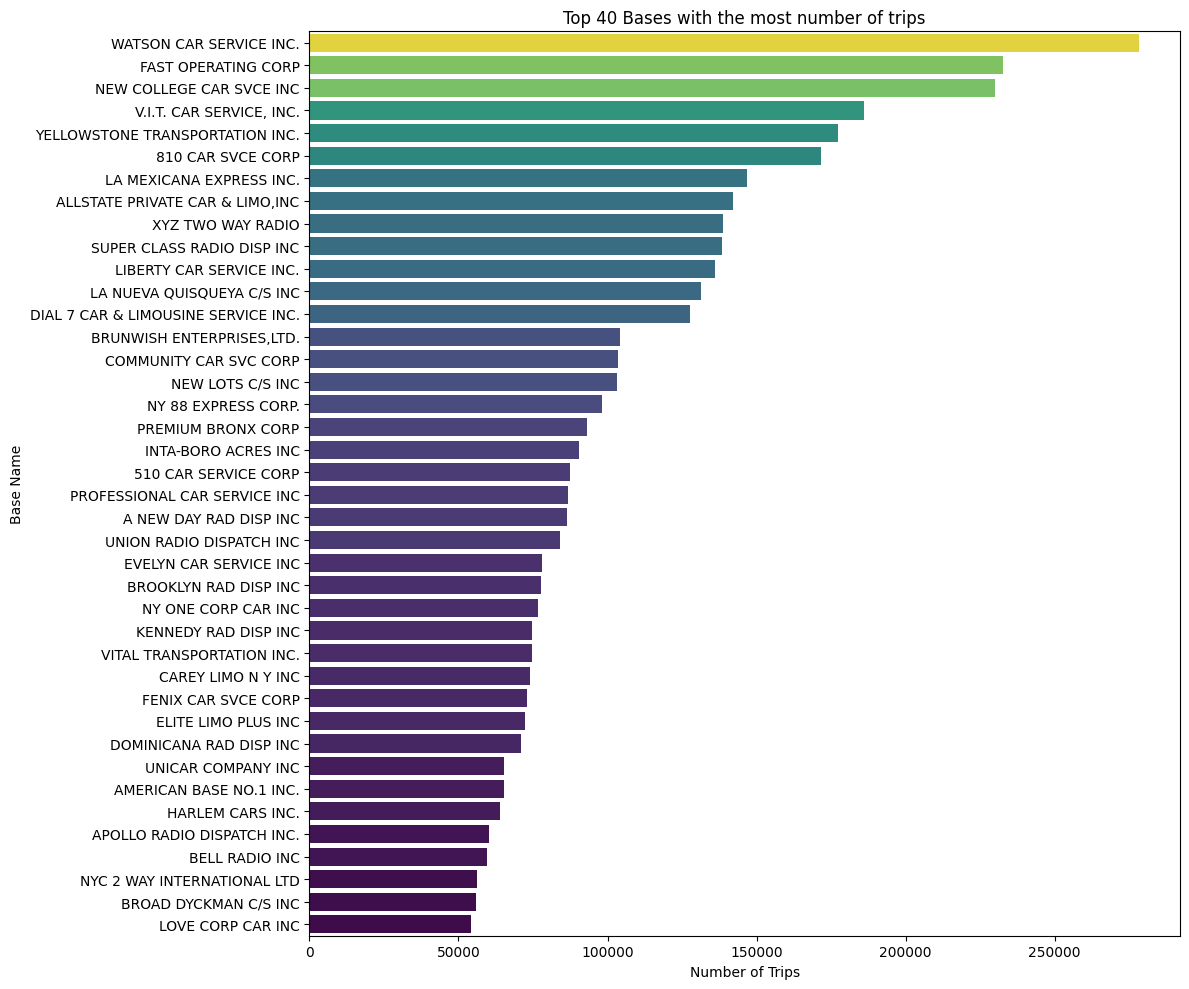

In [23]:
top_40_bases = trip_base_summary.sort_values(by='Number of Trips', ascending=False).head(40)

plt.figure(figsize=(12, 10))
sns.barplot(x='Number of Trips', y='Base Name', data=top_40_bases, palette='viridis', hue='Number of Trips', legend=False)

plt.title('Top 40 Bases with the most number of trips')
plt.xlabel('Number of Trips')
plt.ylabel('Base Name')

plt.tight_layout()
plt.show()

In [24]:
vehicles_base_summary = data.groupby('Base Name')['Number of Vehicles'].sum().reset_index()

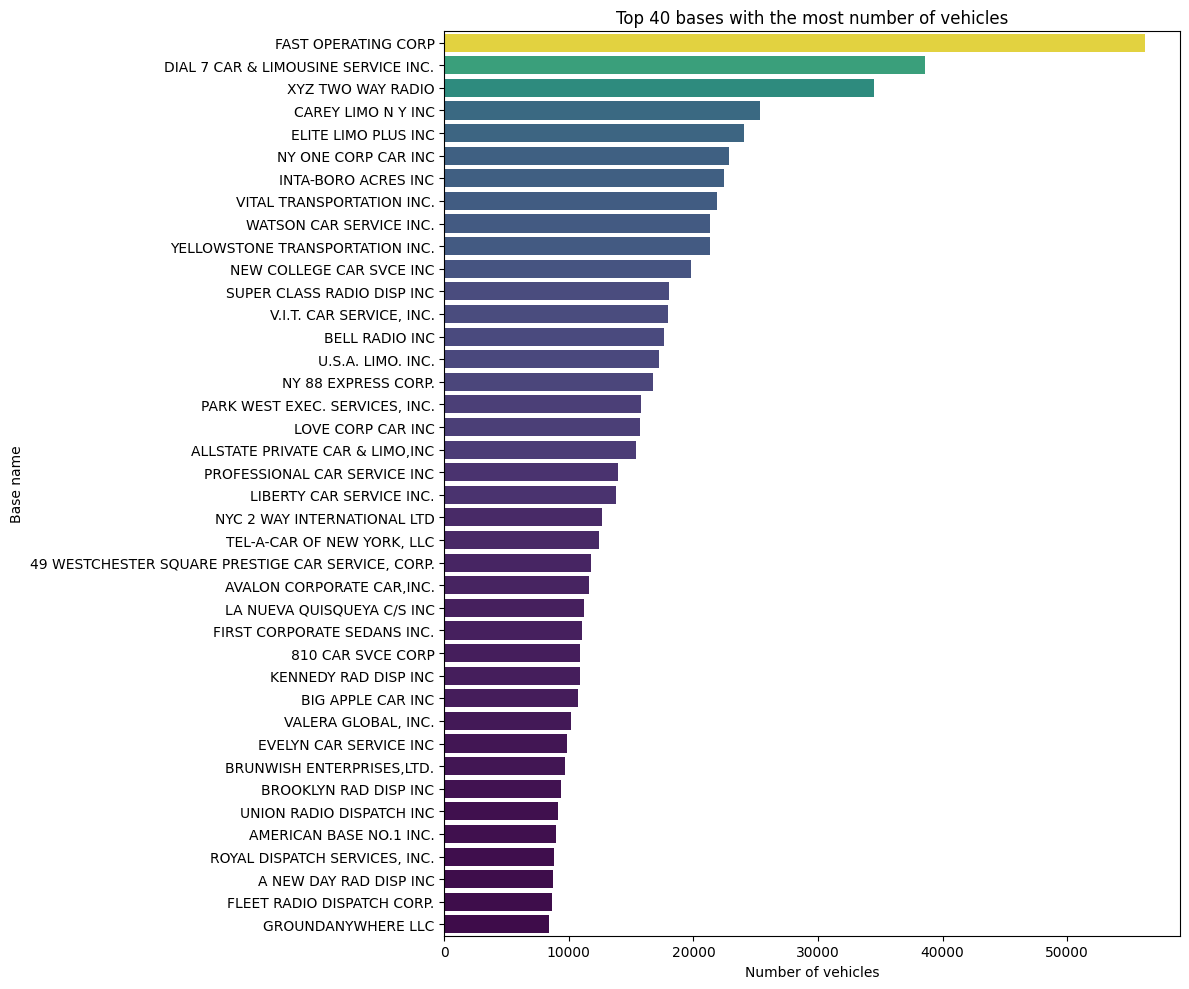

In [25]:
top_40_bases = vehicles_base_summary.sort_values(by='Number of Vehicles', ascending=False).head(40)

plt.figure(figsize=(12, 10))
sns.barplot(x='Number of Vehicles', y='Base Name', data=top_40_bases, palette='viridis', hue='Number of Vehicles', legend=False)

plt.title('Top 40 bases with the most number of vehicles')
plt.xlabel('Number of vehicles')
plt.ylabel('Base name')

plt.tight_layout()
plt.show()